# Explainability using SHAP

This notebook uses SHAP to explain predictions from the ANN model (using KernelExplainer)


In [3]:
import pandas as pd
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("default_of_credit_card_clients.csv")
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.drop(columns=['ID'], inplace=True)

X = df.drop(columns='default')
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Load scaler and transform
scaler = joblib.load("scaler.pkl")
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)


c:\Users\Sangeeth\.virtualenvs\LangChain_With_GenAI-OjtExoUz\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 🔍 SHAP for Neural Network (ANN)

In [4]:
# Load ANN model
ann_model = load_model("best_model_ann.h5")

# Use a sample of the training data (SHAP KernelExplainer is slow)
X_sample = X_train_scaled[:100]
X_test_sample = X_test_scaled[:50]

# SHAP for ANN using KernelExplainer
explainer_ann = shap.KernelExplainer(ann_model.predict, X_sample)
shap_values_ann = explainer_ann.shap_values(X_test_sample, nsamples=100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


  2%|▏         | 1/50 [00:00<00:16,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


  4%|▍         | 2/50 [00:00<00:14,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


  6%|▌         | 3/50 [00:00<00:14,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


  8%|▊         | 4/50 [00:01<00:14,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


 10%|█         | 5/50 [00:01<00:14,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


 12%|█▏        | 6/50 [00:01<00:14,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


 14%|█▍        | 7/50 [00:02<00:13,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


 16%|█▌        | 8/50 [00:02<00:13,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


 18%|█▊        | 9/50 [00:02<00:13,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


 20%|██        | 10/50 [00:03<00:13,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


 22%|██▏       | 11/50 [00:03<00:12,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


 24%|██▍       | 12/50 [00:03<00:12,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


 26%|██▌       | 13/50 [00:04<00:11,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


 28%|██▊       | 14/50 [00:04<00:11,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


 30%|███       | 15/50 [00:04<00:10,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


 32%|███▏      | 16/50 [00:05<00:10,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


 34%|███▍      | 17/50 [00:05<00:09,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


 36%|███▌      | 18/50 [00:05<00:09,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


 38%|███▊      | 19/50 [00:05<00:09,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


 40%|████      | 20/50 [00:06<00:08,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


 42%|████▏     | 21/50 [00:06<00:08,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


 44%|████▍     | 22/50 [00:06<00:08,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


 46%|████▌     | 23/50 [00:07<00:07,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


 48%|████▊     | 24/50 [00:07<00:07,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


 50%|█████     | 25/50 [00:07<00:07,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


 52%|█████▏    | 26/50 [00:08<00:07,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


 54%|█████▍    | 27/50 [00:08<00:06,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


 56%|█████▌    | 28/50 [00:08<00:06,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


 58%|█████▊    | 29/50 [00:08<00:06,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


 60%|██████    | 30/50 [00:09<00:05,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


 62%|██████▏   | 31/50 [00:09<00:05,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 64%|██████▍   | 32/50 [00:09<00:05,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


 66%|██████▌   | 33/50 [00:10<00:05,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


 68%|██████▊   | 34/50 [00:10<00:05,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


 70%|███████   | 35/50 [00:10<00:04,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


 72%|███████▏  | 36/50 [00:11<00:04,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


 74%|███████▍  | 37/50 [00:11<00:04,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


 76%|███████▌  | 38/50 [00:11<00:03,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step


 78%|███████▊  | 39/50 [00:12<00:03,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 80%|████████  | 40/50 [00:12<00:03,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


 82%|████████▏ | 41/50 [00:12<00:02,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


 84%|████████▍ | 42/50 [00:13<00:02,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 86%|████████▌ | 43/50 [00:13<00:02,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


 88%|████████▊ | 44/50 [00:13<00:01,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


 90%|█████████ | 45/50 [00:14<00:01,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


 92%|█████████▏| 46/50 [00:14<00:01,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


 94%|█████████▍| 47/50 [00:14<00:01,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


 96%|█████████▌| 48/50 [00:15<00:00,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


 98%|█████████▊| 49/50 [00:15<00:00,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


100%|██████████| 50/50 [00:15<00:00,  3.17it/s]


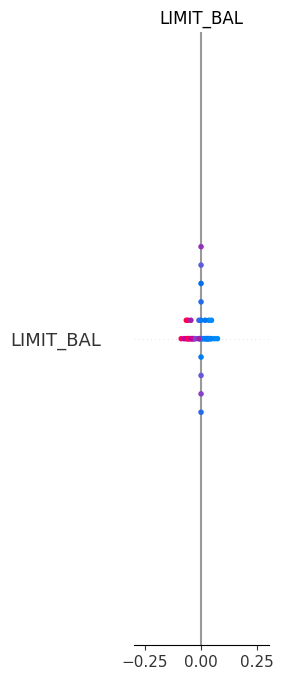

In [6]:
# Summary plot
shap.summary_plot(shap_values_ann, X_test.iloc[:50], plot_type="bar")

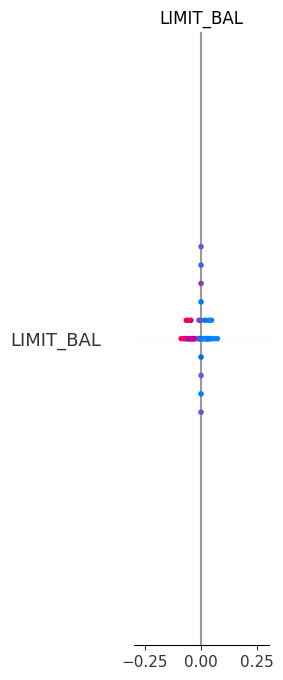

In [7]:
shap.summary_plot(shap_values_ann, X_test.iloc[:50])